In [4]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from nltk.corpus import stopwords
nltk.download('stopwords')
from CleanData import clean_comment, get_bag_of_words
import datetime

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to C:\Users\Zehan
[nltk_data]     Chao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Load all article reviews:
media_bias = pd.read_csv('../data/MediaBiasChart.csv')
media_bias = media_bias.groupby('Source').mean()
media_bias.reset_index(level=0, inplace=True)
media_bias

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,Al Jazeera,-3.705333,46.700000
3,Alternet,-19.156250,26.385000
4,"American Spectator, The",21.767778,23.481111
...,...,...,...
103,Washington Times,12.966667,37.228000
104,Weather.com,-2.434000,51.300000
105,Wonkette,-27.716154,17.336923
106,World Truth TV,8.480769,15.262308


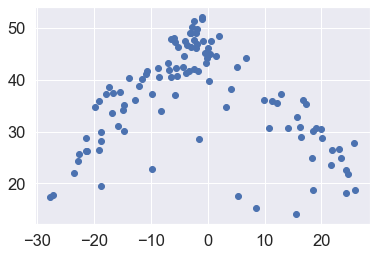

In [6]:
plt.scatter(media_bias['Bias'].to_numpy(),media_bias['Quality'].to_numpy())

[]

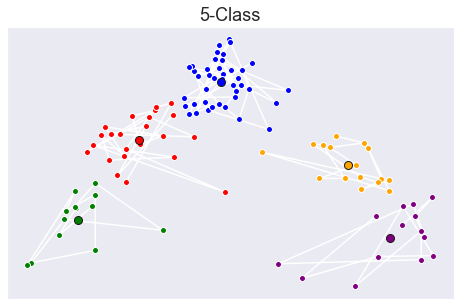

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
centers = [[-20, 20], [-10, 35], [0, 50], [10, 35], [20, 20]]
n_clusters = len(centers)
X = media_bias[['Bias','Quality']].to_numpy()
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
k_means.fit(X)

colors = ['red', 'orange', 'green','blue','purple']
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=12)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=8)
ax.set_title('5-Class')
ax.set_xticks(())
ax.set_yticks(())

In [8]:
# A hand-make dictionary mapping each media in MediaBiasChart_to_Tweet to their twitter account name
# The full list of media twitter account is from news_outlet_tweet_IDs
# at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/2FIFLH

MediaBiasChart_to_Tweet = {'ABC':'ABC','AP':'AP','Axios':'axios','CNN':'CNN','Wall Street Journal':'WSJ',\
    'The Atlantic':'TheAtlantic','The Hill':'thehill', 'BBC':'BBC', 'Think Progress':'thinkprogress',\
    'MSNBC':'MSNBC','The Nation':'thenation','Daily Beast':'thedailybeast','Mother Jones':'MotherJones',\
    'CNSNews':'cnsnews','Fox News':'FoxNews', 'The Federalist':'FDRLST','Breitbart':'BreitbartNews',\
    'Daily Caller':'DailyCaller','The Blaze':'theblaze','Business Insider':'businessinsider',\
    'CBS':'CBSNews','The Economist':'TheEconomist','BuzzFeed':'BuzzFeed','Daily Signal':'DailySignal',\
    'New Republic':'newrepublic','Foreign Policy':'ForeignPolicy','IJR':'TheIJR','National Review':'NRO',\
    'National Public Radio':'NPR','New York Post':'nypost','New York Times':'nytimes','The New Yorker':'NewYorker',\
    'NewsMax':'newsmax','One America News Network':'OANN','Politico':'politico','Quartz':'qz',\
    'Reason':'reason','Reuters':'Reuters','Slate':'Slate','Talking Points Memo':'TPM','Vanity Fair':'VanityFair',\
    'Vox':'voxdotcom','Washington Examiner':'dcexaminer','Washington Free Beacon':'FreeBeacon',\
    'Washington Post':'washingtonpost','Washington Times':'WashTimes','The Week':'TheWeek','Bloomberg':'Bloomberg',\
    'Christian Science Monitor':'csmonitor', 'Democracy Now':'democracynow','Financial Times':'FT',\
    'Fiscal Times':'TheFiscalTimes','Forbes':'Forbes','Fortune':'FortuneMagazine','Forward':'jdforward',\
    'FreeSpeech TV':'freespeechtv','Huffington Post':'HuffPost','LA Times':'latimes','Marketwatch':'MarketWatch',\
    'OZY':'ozy','PBS':'PBS','ProPublica':'ProPublica','Time':'TIME','USA Today':'USATODAY',\
    'Weather.com':'weatherchannel'}

media_bias.Source.map(MediaBiasChart_to_Tweet)

0                 ABC
1                  AP
2                 NaN
3                 NaN
4                 NaN
            ...      
103         WashTimes
104    weatherchannel
105               NaN
106               NaN
107               NaN
Name: Source, Length: 108, dtype: object

In [9]:
media_bias['Source'] = media_bias.Source.map(MediaBiasChart_to_Tweet)
media_bias = media_bias.dropna()
media_bias.reset_index(drop=True)

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,axios,-5.737857,47.303571
3,BBC,-3.033333,46.266667
4,Bloomberg,-0.850345,47.522759
...,...,...,...
60,dcexaminer,12.166250,35.485000
61,FreeBeacon,16.708125,36.187500
62,washingtonpost,-4.179888,44.567303
63,WashTimes,12.966667,37.228000


In [41]:
df1 = pd.read_csv('../data/filtered_part1.csv')
df2 = pd.read_csv('../data/filtered_part2.csv')
df3 = pd.read_csv('../data/filtered_part3.csv')
df4 = pd.read_csv('../data/filtered_part7.csv')
df = pd.concat([df1, df2, df3, df4], sort = False)
df.shape

(1094757, 5)

In [14]:
# Most of the medias has a fairly good amount of Tweets to be analyzed
pd.set_option('display.max_rows', None)
df.groupby(df['user_screen_name']).size()

user_screen_name
ABC                19218
AP                 17593
BBC                 1998
Bloomberg             53
BreitbartNews       6097
BuzzFeed            7815
CBSNews            19804
CNN                24744
DailyCaller        13308
DailySignal         5330
FDRLST              5293
FT                  6904
Forbes              6452
ForeignPolicy       6452
FortuneMagazine     8627
FoxNews            32025
FreeBeacon          7416
HuffPost            5150
MSNBC              10273
MarketWatch        10754
MotherJones         6965
NPR                 5522
NRO                 6804
NewYorker           5037
OANN                4408
PBS                 3764
Reuters            32057
Slate              14737
TIME               14012
TPM                 3085
TheAtlantic         4814
TheEconomist       17696
TheFiscalTimes      3208
TheIJR              3859
TheWeek             6335
USATODAY           11778
VanityFair          2867
WSJ                21152
WashTimes          12310
axios   

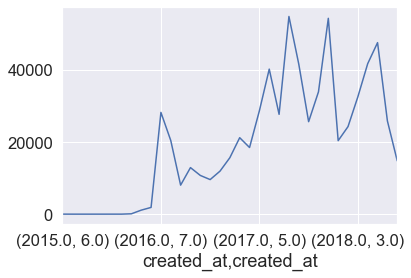

In [17]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.groupby([df['created_at'].dt.year, df['created_at'].dt.month]).size().plot()

In [39]:
df1 = pd.read_csv('../data/filtered_part2.csv')
df1 = df1.reset_index(drop=True)
header = df1.iloc[0]
df1 = df1[1:]
df1.rename(columns = header)
df1.head(5)

,user_screen_name,text,created_at,hashtags
1,NewYorker,It’s striking to hear Trump imply that Nazis a...,2017-08-14 01:04:07+00:00,NaN
2,NewYorker,Though the movie “Good Time” is strewn with hu...,2017-08-14 01:30:07+00:00,NaN
3,NewYorker,"What it feels like on Guam, caught between Tru...",2017-08-13 17:00:12+00:00,NaN
4,NewYorker,Things to do with newspapers to avoid reading ...,2017-08-13 23:30:16+00:00,NaN
5,NewYorker,"This week's cover, ""Upstate,"" by Adrian Tomine...",2017-08-14 12:00:29+00:00,NaN
